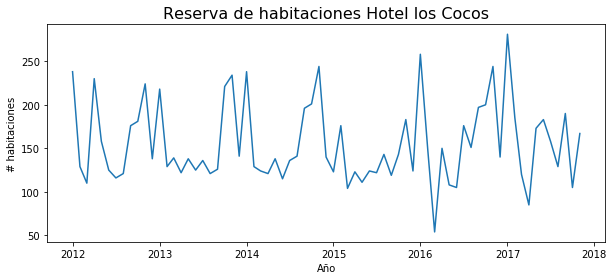

In [8]:
import re
import os
import sys
import datetime
import itertools
import math
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss	

#serie de tiempo en grafico

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
data = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

#guardar en otra variable
ts = data['#guests']

#imprimir la serie de tiempo y guardarla en la carpeta imagen como referencia
plt.plot(data)
plt.title('Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel('# habitaciones')
plt.xlabel('Año')
plt.savefig('./img/serie_huespedes.png')
plt.show()

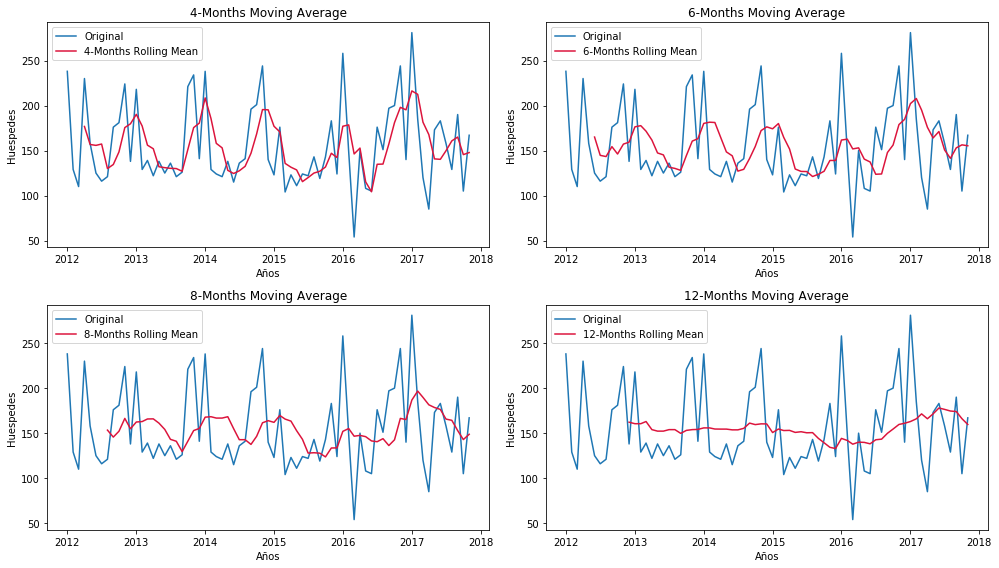

In [9]:

#analisis de tendencia
# definir figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);

# push data to each ax
#upper left
axes[0][0].plot(ts.index, ts, label='Original');
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Años");
axes[0][0].set_ylabel("Huespedes");
axes[0][0].set_title("4-Months Moving Average");
axes[0][0].legend(loc='best');

# upper right
axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Años");
axes[0][1].set_ylabel("Huespedes");
axes[0][1].set_title("6-Months Moving Average");
axes[0][1].legend(loc='best');

# lower left
axes[1][0].plot(ts.index, ts, label='Original');
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Años");
axes[1][0].set_ylabel("Huespedes");
axes[1][0].set_title("8-Months Moving Average");
axes[1][0].legend(loc='best');

# lower right
axes[1][1].plot(ts.index, ts, label='Original');
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Años");
axes[1][1].set_ylabel("Huespedes");
axes[1][1].set_title("12-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.savefig('./img/tendencia.png')
plt.show()

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
df = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)

df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year

month_names = pd.date_range(start='2008-01-01', periods=12, freq='MS').strftime('%b')
df_piv_line = df.pivot(index='Month', columns='Year', values='#guests')
df_piv_line = df_piv_line.reindex(index=month_names)
df_piv_line

Year,2012,2013,2014,2015,2016,2017
Jan,238.00000,218.00000,238.00000,123.00000,258.00000,281.00000
Feb,129.00000,129.00000,129.00000,176.00000,149.00000,185.00000
Mar,110.00000,139.00000,124.00000,104.00000,54.00000,120.00000
Apr,230.00000,122.00000,121.00000,123.00000,150.00000,85.00000
May,158.00000,138.00000,138.00000,111.00000,108.00000,173.00000
Jun,125.00000,125.00000,115.00000,124.00000,105.00000,183.00000
Jul,116.00000,136.00000,136.00000,122.00000,176.00000,158.00000
Aug,121.00000,121.00000,141.00000,143.00000,151.00000,129.00000
Sep,176.00000,126.00000,196.00000,119.00000,197.00000,190.00000
Oct,181.00000,221.00000,201.00000,143.00000,200.00000,105.00000


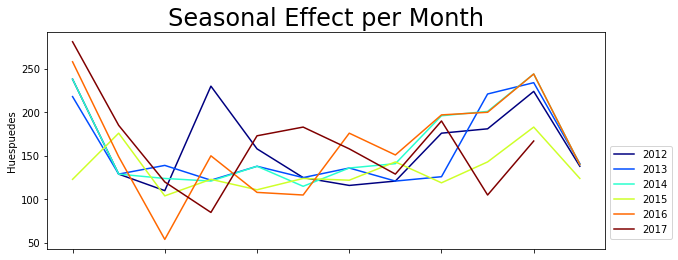

In [11]:
# create line plot
df_piv_line.plot(colormap='jet');
plt.title('Seasonal Effect per Month', fontsize=24)
plt.ylabel('Huespuedes')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./img/seasonal_effect_lines.png')
plt.show()

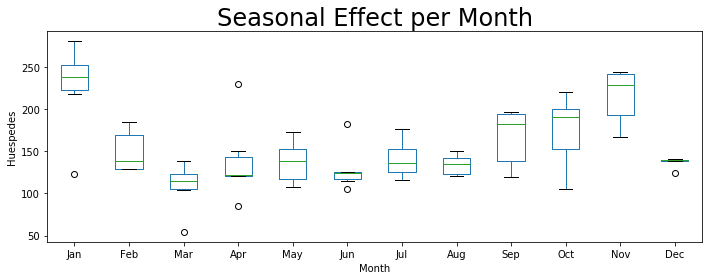

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#leer la data del excel de los huespedes.csv
df = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year


month_names = pd.date_range(start='2008-01-01', periods=12, freq='MS').strftime('%b')


df_piv_box = df.pivot(index='Year', columns='Month', values='#guests')


df_piv_box = df_piv_box.reindex(columns=month_names)


fig, ax = plt.subplots();
df_piv_box.plot(ax=ax, kind='box');
ax.set_title('Seasonal Effect per Month', fontsize=24);
ax.set_xlabel('Month');
ax.set_ylabel('Huespedes');
ax.xaxis.set_ticks_position('bottom');
fig.tight_layout();
plt.savefig('./img/seasonal_effect_boxplot.png')
plt.show()

In [14]:
y = data['#guests']
def adf_test(y):
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)
adf_test(y)    

Results of Augmented Dickey-Fuller test:
test statistic         -7.68251
p-value                 0.00000
# of lags               0.00000
# of observations      70.00000
Critical Value (1%)    -3.52743
Critical Value (5%)    -2.90381
Critical Value (10%)   -2.58932
dtype: float64


In [22]:
def ts_diagnostics(y, lags=None, title='', filename=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    
    rolling_mean = y.rolling(12).mean()
    rolling_std = y.rolling(12).std()
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.savefig('./img/{}.png'.format(filename))
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

No handles with labels found to put in legend.


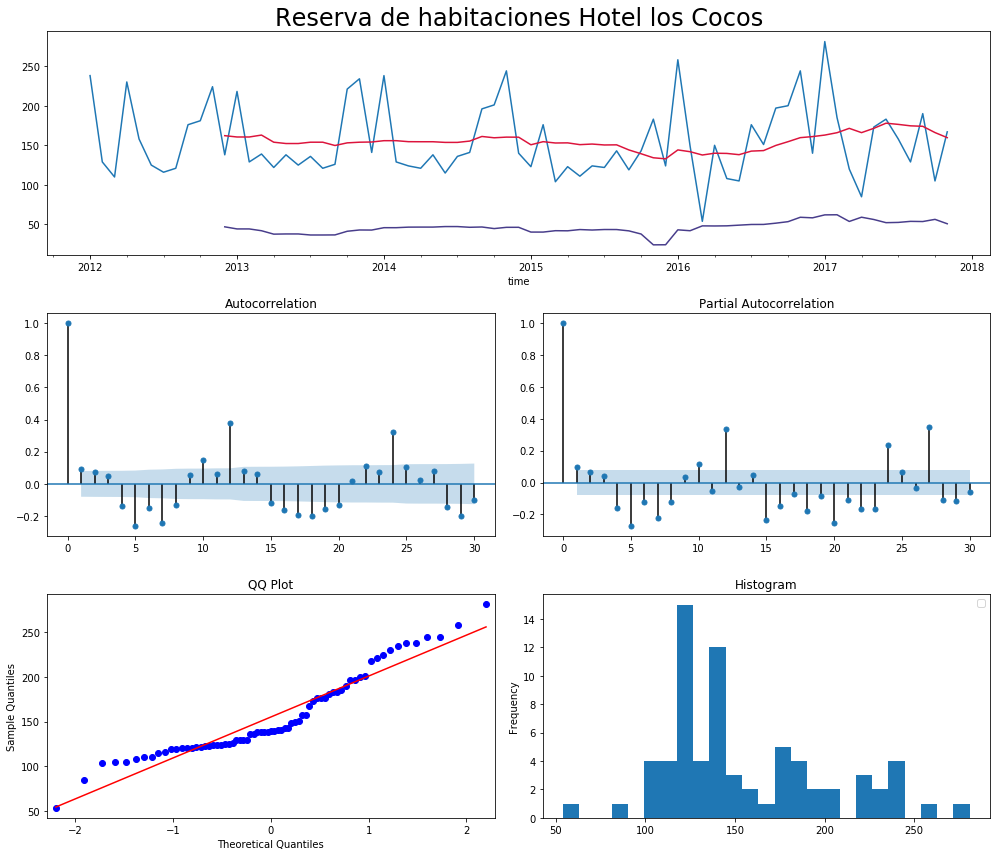

Results of Dickey-Fuller test:
test statistic         -7.68251
p-value                 0.00000
# of lags               0.00000
# of observations      70.00000
Critical Value (1%)    -3.52743
Critical Value (5%)    -2.90381
Critical Value (10%)   -2.58932
dtype: float64


In [23]:
ts_diagnostics(y, lags=30, title='Reserva de habitaciones Hotel los Cocos', filename='adf_data')


No handles with labels found to put in legend.


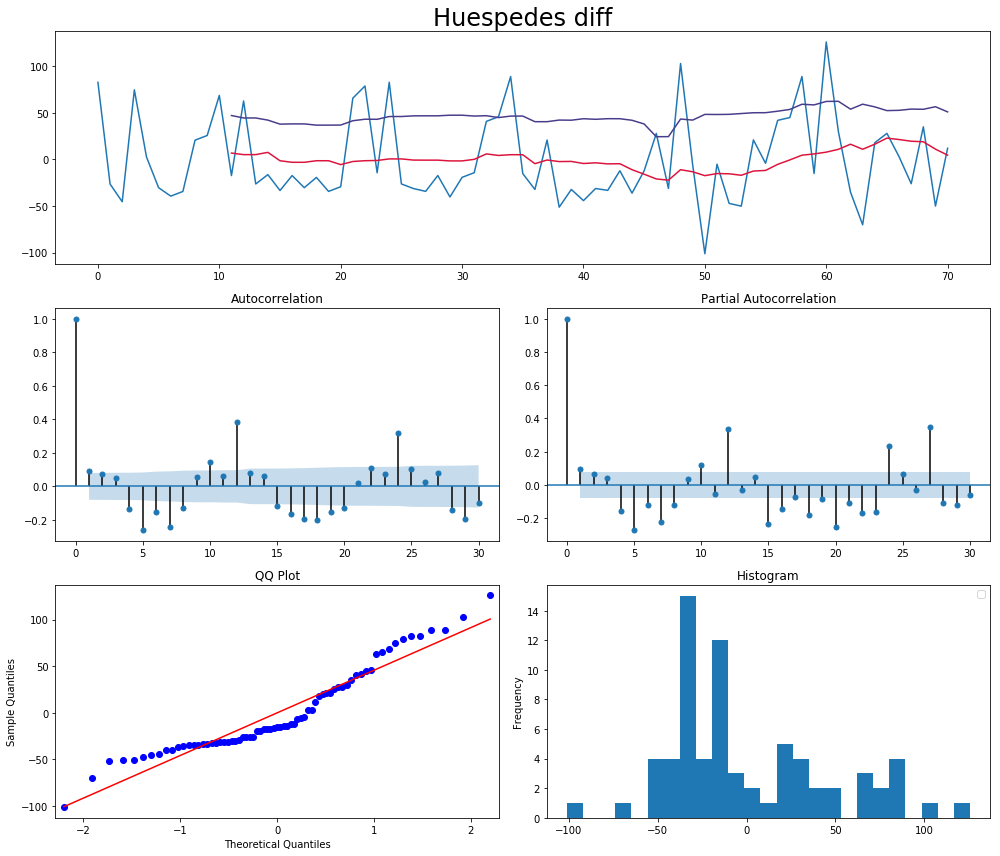

Results of Dickey-Fuller test:
test statistic         -7.68093
p-value                 0.00000
# of lags               0.00000
# of observations      70.00000
Critical Value (1%)    -3.52743
Critical Value (5%)    -2.90381
Critical Value (10%)   -2.58932
dtype: float64


In [24]:
from scipy import signal
y_detrend = signal.detrend(y)
y_diff = np.diff(y)
ts_diagnostics(y_detrend, lags=30, title='Huespedes diff', filename='adf_diff')

No handles with labels found to put in legend.


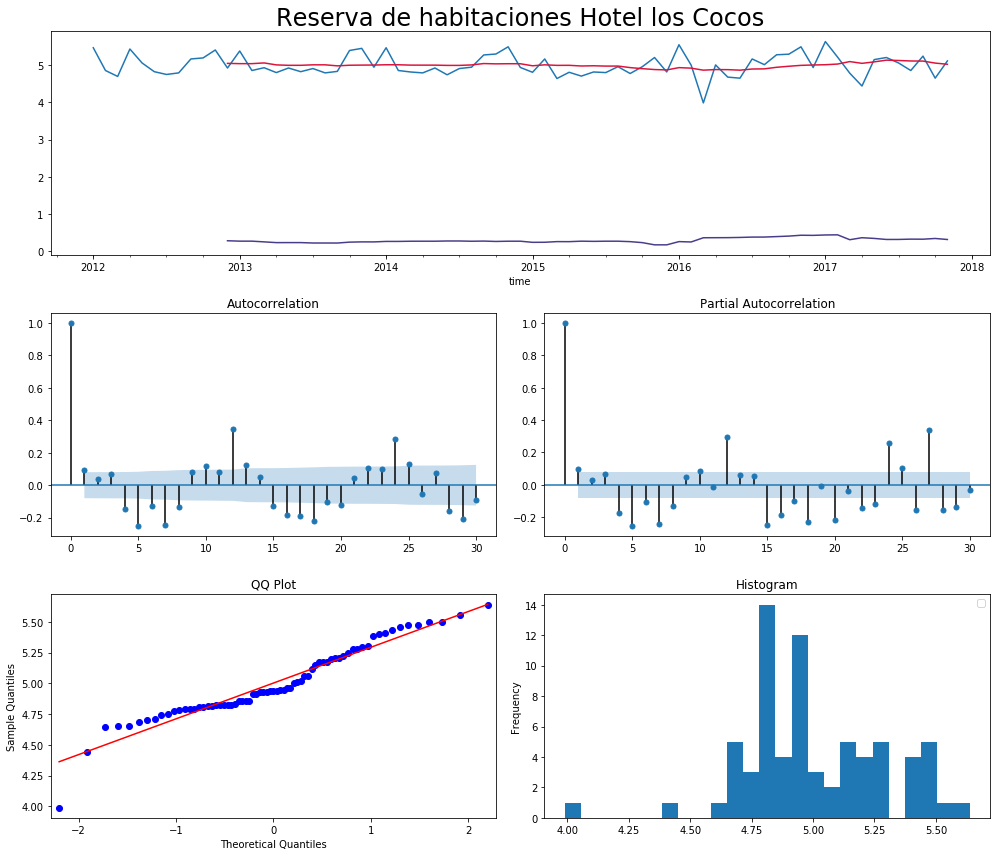

Results of Dickey-Fuller test:
test statistic         -7.62992
p-value                 0.00000
# of lags               0.00000
# of observations      70.00000
Critical Value (1%)    -3.52743
Critical Value (5%)    -2.90381
Critical Value (10%)   -2.58932
dtype: float64


In [39]:
y_log = np.log(y)
ts_diagnostics(y_log, lags=30, title='Reserva de habitaciones Hotel los Cocos', filename='adf_log')

No handles with labels found to put in legend.


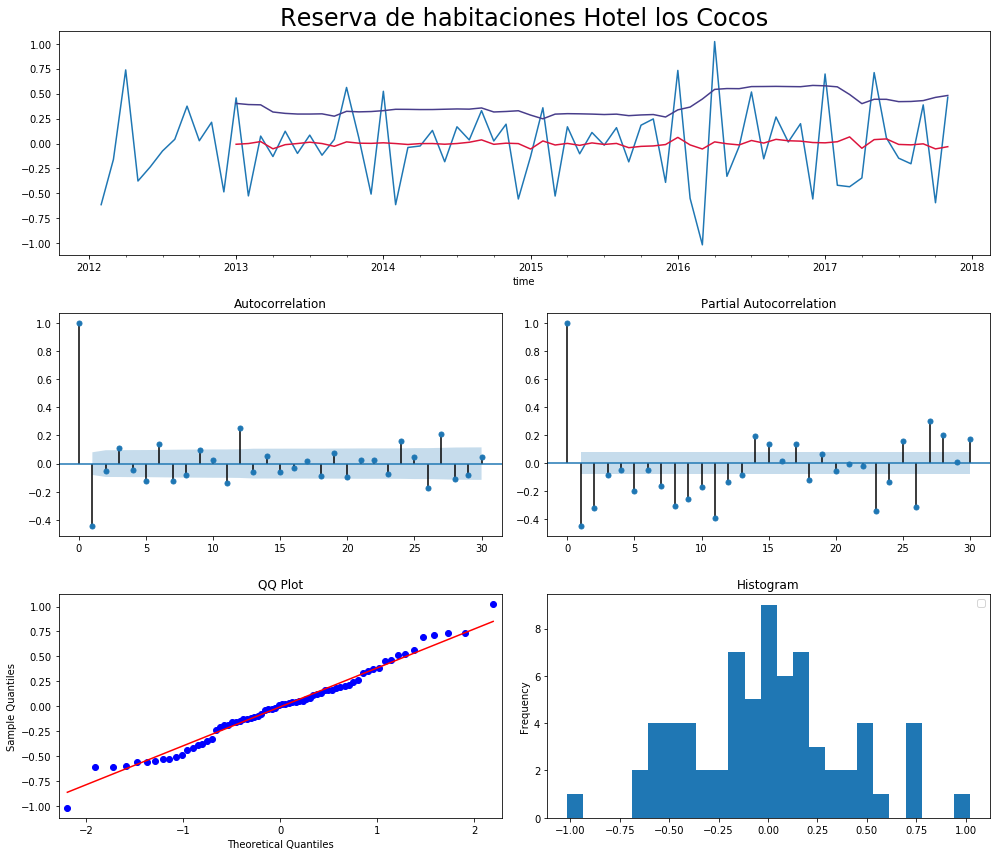

Results of Dickey-Fuller test:
test statistic         -5.47643
p-value                 0.00000
# of lags              10.00000
# of observations      59.00000
Critical Value (1%)    -3.54639
Critical Value (5%)    -2.91194
Critical Value (10%)   -2.59365
dtype: float64


In [40]:
y_log_diff = np.log(y).diff().dropna()
ts_diagnostics(y_log_diff, lags=30, title='Reserva de habitaciones Hotel los Cocos', filename='adf_log_diff')

No handles with labels found to put in legend.


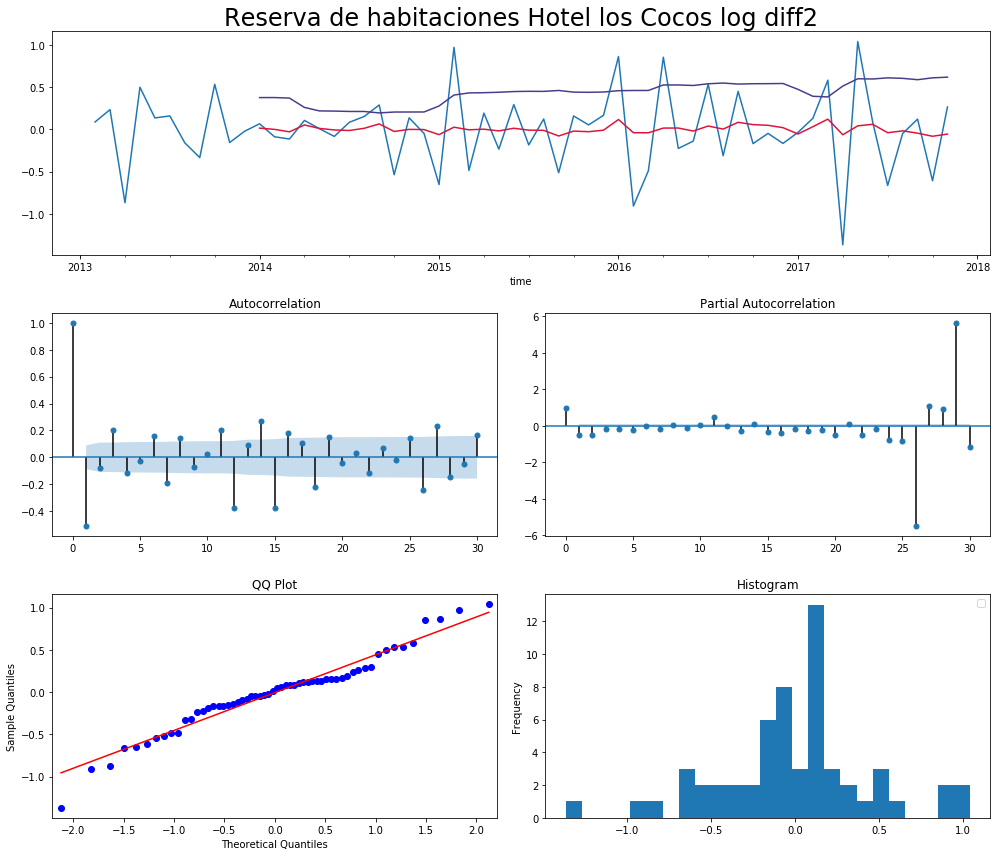

Results of Dickey-Fuller test:
test statistic         -0.48366
p-value                 0.89517
# of lags              10.00000
# of observations      47.00000
Critical Value (1%)    -3.57785
Critical Value (5%)    -2.92534
Critical Value (10%)   -2.60077
dtype: float64


In [41]:
y_log_diff2 = np.log(y).diff(1).diff(12).dropna()
ts_diagnostics(y_log_diff2, lags=30, title='Reserva de habitaciones Hotel los Cocos log diff2', filename='adf_log_diff2')

In [28]:
#prediccion SARIMA
# split into training and test sets
y = df['#guests']
y_train = y[:'2017']
y_test = y['2016':]
y_test
y_train

time
2012-01-01    238
2012-02-01    129
2012-03-01    110
2012-04-01    230
2012-05-01    158
2012-06-01    125
2012-07-01    116
2012-08-01    121
             ... 
2017-04-01     85
2017-05-01    173
2017-06-01    183
2017-07-01    158
2017-08-01    129
2017-09-01    190
2017-10-01    105
2017-11-01    167
Name: #guests, Length: 71, dtype: int64

In [29]:
# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [38]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            res = tmp_mdl.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))



Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

513.8145770915555
                                 Statespace Model Results                                 
Dep. Variable:                            #guests   No. Observations:                   71
Model:             SARIMAX(2, 2, 2)x(2, 2, 0, 12)   Log Likelihood                -249.907
Date:                            Thu, 27 Sep 2018   AIC                            513.815
Time:                                    01:21:52   BIC                            526.461
Sample:                                01-01-2012   HQIC                           518.529
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1181      0.281     -0.421      0.674      -0.669       0.432
ar.L2         -0.

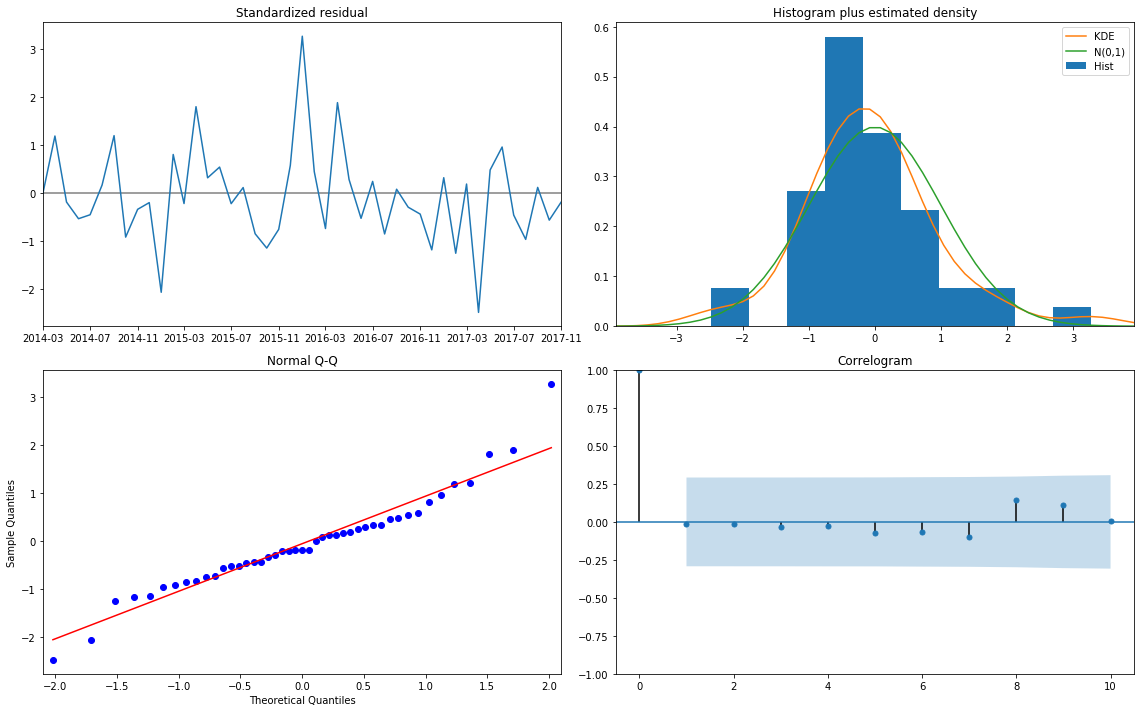

In [42]:
# define SARIMAX model and fit it to the data
mdl = sm.tsa.statespace.SARIMAX(y_train,
                                order=(2, 2, 2),
                                seasonal_order=(2, 2, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
res = mdl.fit()

# print statistics
print(res.aic)
print(res.summary())

from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
print(chi)
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

In [43]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

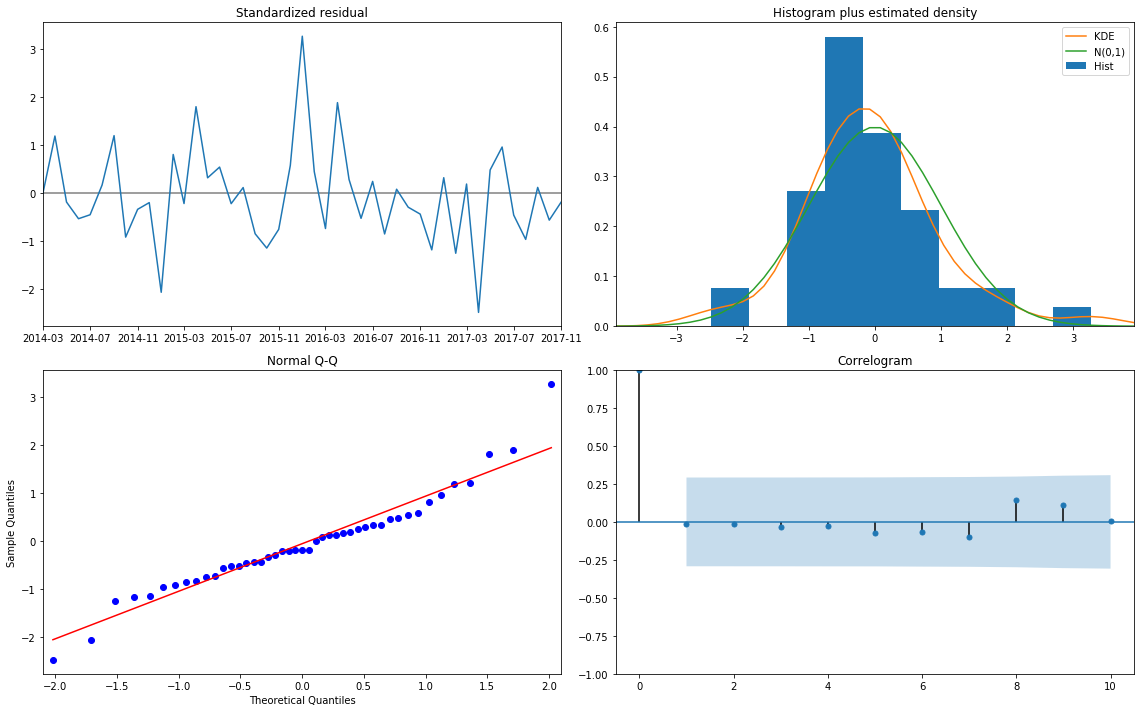

In [44]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.savefig('./img/arima_resid.png')
plt.show()

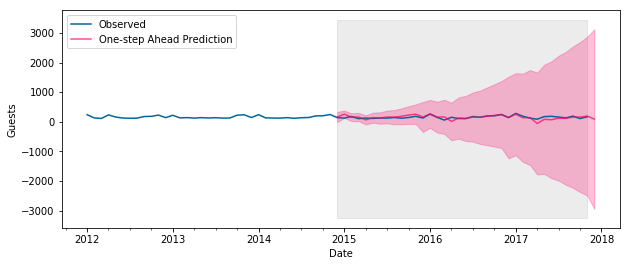

In [47]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(y_train,
                                order=(2, 2, 2),
                                seasonal_order=(2, 2, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-12-01'), 
                          end=pd.to_datetime('2017-12-01'),
                          dynamic=True)
pred_ci = pred.conf_int()

# plot in-sample-prediction
ax = y['1949':].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');

# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);

# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('Guests');
plt.legend(loc='upper left');
plt.savefig('./img/in_sample_pred.png')
plt.show()

In [48]:
y_hat = pred.predicted_mean
y_true = y['2014-12-01':]

# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 3652.58 MSE (60.44 RMSE)


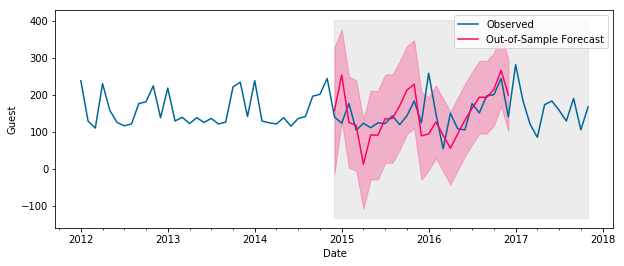

In [52]:
# predict out of sample and find confidence bounds
pred_out = res.get_prediction(start=pd.to_datetime('2014-12-01'), 
                              end=pd.to_datetime('2016-12-01'), 
                              dynamic=False, full_results=True)
pred_out_ci = pred_out.conf_int()

# plot time series and out of sample prediction
ax = y['1949':].plot(label='Observed', color='#006699')
pred_out.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')
ax.fill_between(pred_out_ci.index,
                pred_out_ci.iloc[:, 0],
                pred_out_ci.iloc[:, 1], color='#ff0066', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Guest')
plt.legend()
plt.savefig('./img/out_of_sample_pred.png')
plt.show()

In [50]:
# extract the predicted and true values of our time series
y_hat = pred_out.predicted_mean
y_true = y['2014-12-01':]

# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 3577.82 MSE (59.81 RMSE)


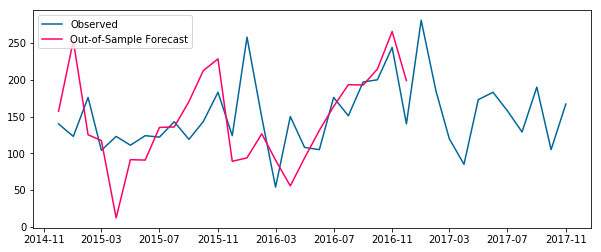

In [53]:

plt.plot(y_true, label='Observed', color='#006699')
plt.plot(y_hat, label='Out-of-Sample Forecast', color='#ff0066')
ax.set_xlabel('Date')
ax.set_ylabel('Guests')
plt.legend(loc='upper left');
plt.savefig('./img/out_of_sample_comparison.png')
plt.show()